#### Chuẩn bị data: các bước giống với lúc trích xuất data cho tập train

B1: Tạo 1 folder đặt tên data_testing là thư mục con của data_testing<br/>
B2: Download video testing và lưu vào folder đó

In [1]:
# Thêm autoreload vào để tự động reload lại module nếu có thay đổi code trong module
%load_ext autoreload
%autoreload 2

import mediapipe as mp
import pandas as pd
import os, sys
import warnings

# Thêm đường dẫn dẫn đến thư mục cha
sys.path.append(os.path.abspath(".."))
warnings.filterwarnings("ignore")

# Drawing helpers
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

from utils.common import load_model

In [2]:
# Load model
XGB_model = load_model('./best_models/XGB.pkl')

# Load input scaler
input_scaler = load_model("./best_models/input_scaler.pkl")

### 1. Determine important landmarks for plank

In [3]:
def get_class(encode_label: float):
    return {
        0: "D",
        1: "M",
        2: "U"
    }.get(encode_label, "Unknown")

#### Testing

In [4]:
test_df = pd.read_csv("test.csv")

In [5]:
test_df.shape

(206, 28)

In [6]:
test_df.head()

,label,nose_x,nose_y,nose_z,left_shoulder_x,left_shoulder_y,left_shoulder_z,right_shoulder_x,right_shoulder_y,right_shoulder_z,...,left_wrist_z,right_wrist_x,right_wrist_y,right_wrist_z,left_hip_x,left_hip_y,left_hip_z,right_hip_x,right_hip_y,right_hip_z
0,U,-0.099496,-0.215159,-0.181005,0.004424,-0.173447,-0.412114,-0.006952,-0.174993,0.149230,...,-0.048079,-0.095110,-0.142769,0.066370,0.008413,0.003780,-0.181003,-0.008413,-0.003780,0.181263
1,U,-0.072659,-0.236096,-0.295500,0.017952,-0.171459,-0.511871,0.021302,-0.178814,0.089768,...,-0.075260,-0.083580,-0.151104,-0.142671,0.007879,0.003584,-0.191259,-0.007879,-0.003584,0.191197
2,U,-0.068753,-0.234685,-0.239123,0.020752,-0.172757,-0.502652,0.026368,-0.178527,0.156158,...,-0.039767,-0.101593,-0.141095,-0.213163,-0.000248,0.003970,-0.204557,0.000248,-0.003970,0.204450
3,U,0.189107,-0.228630,-0.231003,0.134729,-0.147939,-0.434127,0.139575,-0.152146,0.152560,...,-0.166562,0.027448,-0.137450,0.314156,-0.005281,0.004023,-0.182072,0.005281,-0.004023,0.182254
4,U,0.179015,-0.225892,-0.226073,0.140263,-0.150869,-0.413554,0.133403,-0.170942,0.147782,...,0.059117,0.041792,-0.175358,0.296240,0.005114,0.006096,-0.184629,-0.005114,-0.006095,0.184693


In [7]:
X_test = test_df.drop(columns=["label"])
y_test = test_df["label"]

#### Chuẩn hoá dữ liệu

In [8]:
X_test = input_scaler.transform(X_test)

In [9]:
X_test

array([[-0.94526069,  1.39290986,  0.69925937, ...,  0.17073459,
        -0.97113585,  0.8701619 ],
       [-0.68748226,  0.86603396, -0.38802883, ...,  0.21550185,
        -0.91092974,  0.91778629],
       [-0.64996451,  0.90153937,  0.14735294, ...,  0.89760094,
        -1.02951837,  0.98131775],
       ...,
       [ 0.94956825,  1.04519298, -0.465274  , ...,  0.00166304,
         0.98646991, -1.03540166],
       [ 1.00638892,  1.32051381, -0.1678075 , ..., -0.07267892,
         0.98630496, -1.03389758],
       [ 0.93884317,  1.24241257,  0.35732532, ...,  0.42987342,
         0.95670591, -1.01627515]])

In [10]:
# Chuyển dữ liệu của label về dạng số
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_test = label_encoder.fit_transform(y_test)

In [11]:
y_pred = XGB_model.predict(X_test)

# Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)

In [12]:
accuracy

0.8737864077669902

In [13]:
test_df

,label,nose_x,nose_y,nose_z,left_shoulder_x,left_shoulder_y,left_shoulder_z,right_shoulder_x,right_shoulder_y,right_shoulder_z,...,left_wrist_z,right_wrist_x,right_wrist_y,right_wrist_z,left_hip_x,left_hip_y,left_hip_z,right_hip_x,right_hip_y,right_hip_z
0,U,-0.099496,-0.215159,-0.181005,0.004424,-0.173447,-0.412114,-0.006952,-0.174993,0.149230,...,-0.048079,-0.095110,-0.142769,0.066370,0.008413,0.003780,-0.181003,-0.008413,-0.003780,0.181263
1,U,-0.072659,-0.236096,-0.295500,0.017952,-0.171459,-0.511871,0.021302,-0.178814,0.089768,...,-0.075260,-0.083580,-0.151104,-0.142671,0.007879,0.003584,-0.191259,-0.007879,-0.003584,0.191197
2,U,-0.068753,-0.234685,-0.239123,0.020752,-0.172757,-0.502652,0.026368,-0.178527,0.156158,...,-0.039767,-0.101593,-0.141095,-0.213163,-0.000248,0.003970,-0.204557,0.000248,-0.003970,0.204450
3,U,0.189107,-0.228630,-0.231003,0.134729,-0.147939,-0.434127,0.139575,-0.152146,0.152560,...,-0.166562,0.027448,-0.137450,0.314156,-0.005281,0.004023,-0.182072,0.005281,-0.004023,0.182254
4,U,0.179015,-0.225892,-0.226073,0.140263,-0.150869,-0.413554,0.133403,-0.170942,0.147782,...,0.059117,0.041792,-0.175358,0.296240,0.005114,0.006096,-0.184629,-0.005114,-0.006095,0.184693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,M,0.090804,-0.228197,-0.279547,-0.008985,-0.177765,0.133977,-0.000537,-0.175058,-0.547355,...,0.019918,0.147063,-0.059543,-0.369436,0.000136,-0.003359,0.223073,-0.000136,0.003359,-0.223225
202,M,0.068938,-0.234659,-0.285207,-0.031754,-0.176700,0.136487,-0.015456,-0.173818,-0.549550,...,0.006528,0.164065,-0.075271,-0.430761,-0.000888,-0.003635,0.221628,0.000888,0.003635,-0.221694
203,M,0.097772,-0.228976,-0.303634,0.002768,-0.175562,0.118123,-0.008198,-0.173933,-0.569883,...,0.016656,0.125171,-0.054225,-0.446413,0.010427,-0.002587,0.216257,-0.010427,0.002587,-0.216250
204,M,0.103688,-0.218036,-0.272310,0.008359,-0.170843,0.141438,-0.007811,-0.171352,-0.536661,...,0.143008,0.159754,-0.083774,-0.445044,0.011313,-0.002586,0.215967,-0.011313,0.002586,-0.215936


In [14]:
# test_df.insert(0, "predicted_label", label_encoder.inverse_transform(y_pred))

In [15]:
test_df.to_csv("test.csv", index=False)

### Kết luận

In [14]:
cf = confusion_matrix(y_test, y_pred)

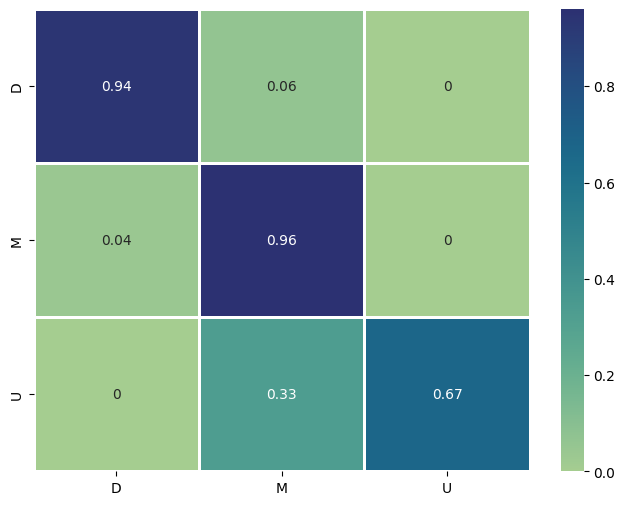

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

label_counts = np.sum(cf, axis=1)
cf = cf / label_counts[:, None]
cm_cross_val = np.round(cf, 2)
confusion_matrix_df = pd.DataFrame(cm_cross_val, index=["D", "M", "U"], columns=["D", "M", "U"])

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(confusion_matrix_df, linewidths=1, annot=True, ax=ax, fmt="g", cmap="crest");